## Цель кейса

У данного кейса две цели: аналитическая и прикладная.

Аналитическая цель состоит в том, чтобы научиться творчески исследовать данные с целью извлечения пользы для продукта.

Прикладная цель — продумать план разработки собственного онлайн-тренажера ЕГЭ на основе предоставленных данных.

## Описание датасета

### inf_ege_data

Датасет **`inf_ege_data`** содержит решения задач детьми на некоторой онлайн-платформе.

* **user_id** — ID пользователя
* **task_id** — ID задачи
* **flow_type** — Где пользователь решал задачу:
    * `practice` — Практика. Пользователь решает подряд задачи одного номера разной сложности. Он может получать подсказки к решению и имеет неограниченное число попыток
    * `variant` — Пробник. Пользователь решает собранный вариант. Подсказок нет, пользователь не видит результат пока не завершит весь вариант, поэтому число попыток не учитывается.
* **task_number** — Номер задачи в варианте ЕГЭ
* **difficulty** — Сложность задачи, число от 1 до 5
* **date** — Дата решения задачи
* **attempts_cnt** — Сколько пользователь сделал попыток решить задачу; может принимать значения от 0, где 0 - пользователь открыл задачу, но даже не попробовал ее решить. Принимает значение `null` для вариантов
* **hints_cnt** — Сколько раз пользователь использовал подсказки, null для вариантов
* **is_correct** — Булевый флаг. Показывает, решил ли правильно задачу

In [120]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('inf_ege_data.csv',
                 dtype={'attempts_cnt': 'UInt32', 'hints_cnt': 'UInt32'},
                 parse_dates=['date'])

df.head()

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665


### WAU

In [121]:
df['week_name'] = df['date'].dt.day_name()

df

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id,week_name
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921,Tuesday
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361,Tuesday
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784,Tuesday
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954,Tuesday
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665,Tuesday
...,...,...,...,...,...,...,...,...,...,...
2573733,2024-03-26,<NA>,4,variant,<NA>,False,73,1,73837,Tuesday
2573734,2024-03-26,<NA>,4,variant,<NA>,False,73,1,188958,Tuesday
2573735,2024-03-26,<NA>,4,variant,<NA>,False,73,1,154130,Tuesday
2573736,2024-03-26,<NA>,4,variant,<NA>,False,73,1,53618,Tuesday


In [122]:
df['weekday'] = df['date'].dt.weekday

df

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id,week_name,weekday
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921,Tuesday,1
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361,Tuesday,1
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784,Tuesday,1
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954,Tuesday,1
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...
2573733,2024-03-26,<NA>,4,variant,<NA>,False,73,1,73837,Tuesday,1
2573734,2024-03-26,<NA>,4,variant,<NA>,False,73,1,188958,Tuesday,1
2573735,2024-03-26,<NA>,4,variant,<NA>,False,73,1,154130,Tuesday,1
2573736,2024-03-26,<NA>,4,variant,<NA>,False,73,1,53618,Tuesday,1


In [123]:
df['weekday'] = df['weekday'].apply(lambda x: np.timedelta64(x, 'D'))

df

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id,week_name,weekday
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921,Tuesday,1 days
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361,Tuesday,1 days
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784,Tuesday,1 days
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954,Tuesday,1 days
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665,Tuesday,1 days
...,...,...,...,...,...,...,...,...,...,...,...
2573733,2024-03-26,<NA>,4,variant,<NA>,False,73,1,73837,Tuesday,1 days
2573734,2024-03-26,<NA>,4,variant,<NA>,False,73,1,188958,Tuesday,1 days
2573735,2024-03-26,<NA>,4,variant,<NA>,False,73,1,154130,Tuesday,1 days
2573736,2024-03-26,<NA>,4,variant,<NA>,False,73,1,53618,Tuesday,1 days


In [124]:
df['week_start_date'] = df['date'] - df['weekday']

df

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id,week_name,weekday,week_start_date
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921,Tuesday,1 days,2024-03-25
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361,Tuesday,1 days,2024-03-25
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784,Tuesday,1 days,2024-03-25
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954,Tuesday,1 days,2024-03-25
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665,Tuesday,1 days,2024-03-25
...,...,...,...,...,...,...,...,...,...,...,...,...
2573733,2024-03-26,<NA>,4,variant,<NA>,False,73,1,73837,Tuesday,1 days,2024-03-25
2573734,2024-03-26,<NA>,4,variant,<NA>,False,73,1,188958,Tuesday,1 days,2024-03-25
2573735,2024-03-26,<NA>,4,variant,<NA>,False,73,1,154130,Tuesday,1 days,2024-03-25
2573736,2024-03-26,<NA>,4,variant,<NA>,False,73,1,53618,Tuesday,1 days,2024-03-25


In [125]:
firstDate = df['week_start_date'].min()
df['week_number_from_start'] = df['week_start_date'].apply(lambda x: int((x - firstDate).days / 7))

df

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id,week_name,weekday,week_start_date,week_number_from_start
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921,Tuesday,1 days,2024-03-25,21
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361,Tuesday,1 days,2024-03-25,21
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784,Tuesday,1 days,2024-03-25,21
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954,Tuesday,1 days,2024-03-25,21
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665,Tuesday,1 days,2024-03-25,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573733,2024-03-26,<NA>,4,variant,<NA>,False,73,1,73837,Tuesday,1 days,2024-03-25,21
2573734,2024-03-26,<NA>,4,variant,<NA>,False,73,1,188958,Tuesday,1 days,2024-03-25,21
2573735,2024-03-26,<NA>,4,variant,<NA>,False,73,1,154130,Tuesday,1 days,2024-03-25,21
2573736,2024-03-26,<NA>,4,variant,<NA>,False,73,1,53618,Tuesday,1 days,2024-03-25,21


In [126]:
df = df.drop('week_start_date', axis=1)

df

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id,week_name,weekday,week_number_from_start
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921,Tuesday,1 days,21
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361,Tuesday,1 days,21
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784,Tuesday,1 days,21
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954,Tuesday,1 days,21
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665,Tuesday,1 days,21
...,...,...,...,...,...,...,...,...,...,...,...,...
2573733,2024-03-26,<NA>,4,variant,<NA>,False,73,1,73837,Tuesday,1 days,21
2573734,2024-03-26,<NA>,4,variant,<NA>,False,73,1,188958,Tuesday,1 days,21
2573735,2024-03-26,<NA>,4,variant,<NA>,False,73,1,154130,Tuesday,1 days,21
2573736,2024-03-26,<NA>,4,variant,<NA>,False,73,1,53618,Tuesday,1 days,21


### MAU

In [127]:
startDate = df['date'].min()
df['month_number_from_start'] = df['date'].apply(lambda x: ((x.month - startDate.month) + (x.year - startDate.year) * 12))

df

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id,week_name,weekday,week_number_from_start,month_number_from_start
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921,Tuesday,1 days,21,4
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361,Tuesday,1 days,21,4
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784,Tuesday,1 days,21,4
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954,Tuesday,1 days,21,4
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665,Tuesday,1 days,21,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573733,2024-03-26,<NA>,4,variant,<NA>,False,73,1,73837,Tuesday,1 days,21,4
2573734,2024-03-26,<NA>,4,variant,<NA>,False,73,1,188958,Tuesday,1 days,21,4
2573735,2024-03-26,<NA>,4,variant,<NA>,False,73,1,154130,Tuesday,1 days,21,4
2573736,2024-03-26,<NA>,4,variant,<NA>,False,73,1,53618,Tuesday,1 days,21,4


In [128]:
df['month_number'] = df['date'].apply(lambda x: x.month)

df

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id,week_name,weekday,week_number_from_start,month_number_from_start,month_number
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921,Tuesday,1 days,21,4,3
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361,Tuesday,1 days,21,4,3
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784,Tuesday,1 days,21,4,3
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954,Tuesday,1 days,21,4,3
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665,Tuesday,1 days,21,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573733,2024-03-26,<NA>,4,variant,<NA>,False,73,1,73837,Tuesday,1 days,21,4,3
2573734,2024-03-26,<NA>,4,variant,<NA>,False,73,1,188958,Tuesday,1 days,21,4,3
2573735,2024-03-26,<NA>,4,variant,<NA>,False,73,1,154130,Tuesday,1 days,21,4,3
2573736,2024-03-26,<NA>,4,variant,<NA>,False,73,1,53618,Tuesday,1 days,21,4,3


### DAU

In [129]:
startDate = df['date'].min()
df['day_number_from_start'] = df['date'].apply(lambda x: (x - startDate).days)

df

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id,week_name,weekday,week_number_from_start,month_number_from_start,month_number,day_number_from_start
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921,Tuesday,1 days,21,4,3,146
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361,Tuesday,1 days,21,4,3,146
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784,Tuesday,1 days,21,4,3,146
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954,Tuesday,1 days,21,4,3,146
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665,Tuesday,1 days,21,4,3,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573733,2024-03-26,<NA>,4,variant,<NA>,False,73,1,73837,Tuesday,1 days,21,4,3,146
2573734,2024-03-26,<NA>,4,variant,<NA>,False,73,1,188958,Tuesday,1 days,21,4,3,146
2573735,2024-03-26,<NA>,4,variant,<NA>,False,73,1,154130,Tuesday,1 days,21,4,3,146
2573736,2024-03-26,<NA>,4,variant,<NA>,False,73,1,53618,Tuesday,1 days,21,4,3,146


In [130]:
df['day_number'] = df['date'].apply(lambda x: x.day)

df

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id,week_name,weekday,week_number_from_start,month_number_from_start,month_number,day_number_from_start,day_number
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921,Tuesday,1 days,21,4,3,146,26
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361,Tuesday,1 days,21,4,3,146,26
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784,Tuesday,1 days,21,4,3,146,26
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954,Tuesday,1 days,21,4,3,146,26
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665,Tuesday,1 days,21,4,3,146,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573733,2024-03-26,<NA>,4,variant,<NA>,False,73,1,73837,Tuesday,1 days,21,4,3,146,26
2573734,2024-03-26,<NA>,4,variant,<NA>,False,73,1,188958,Tuesday,1 days,21,4,3,146,26
2573735,2024-03-26,<NA>,4,variant,<NA>,False,73,1,154130,Tuesday,1 days,21,4,3,146,26
2573736,2024-03-26,<NA>,4,variant,<NA>,False,73,1,53618,Tuesday,1 days,21,4,3,146,26


In [131]:
df['year_number'] = df['date'].apply(lambda x: x.year)

df

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id,week_name,weekday,week_number_from_start,month_number_from_start,month_number,day_number_from_start,day_number,year_number
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921,Tuesday,1 days,21,4,3,146,26,2024
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361,Tuesday,1 days,21,4,3,146,26,2024
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784,Tuesday,1 days,21,4,3,146,26,2024
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954,Tuesday,1 days,21,4,3,146,26,2024
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665,Tuesday,1 days,21,4,3,146,26,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573733,2024-03-26,<NA>,4,variant,<NA>,False,73,1,73837,Tuesday,1 days,21,4,3,146,26,2024
2573734,2024-03-26,<NA>,4,variant,<NA>,False,73,1,188958,Tuesday,1 days,21,4,3,146,26,2024
2573735,2024-03-26,<NA>,4,variant,<NA>,False,73,1,154130,Tuesday,1 days,21,4,3,146,26,2024
2573736,2024-03-26,<NA>,4,variant,<NA>,False,73,1,53618,Tuesday,1 days,21,4,3,146,26,2024


### Plots

### WAU

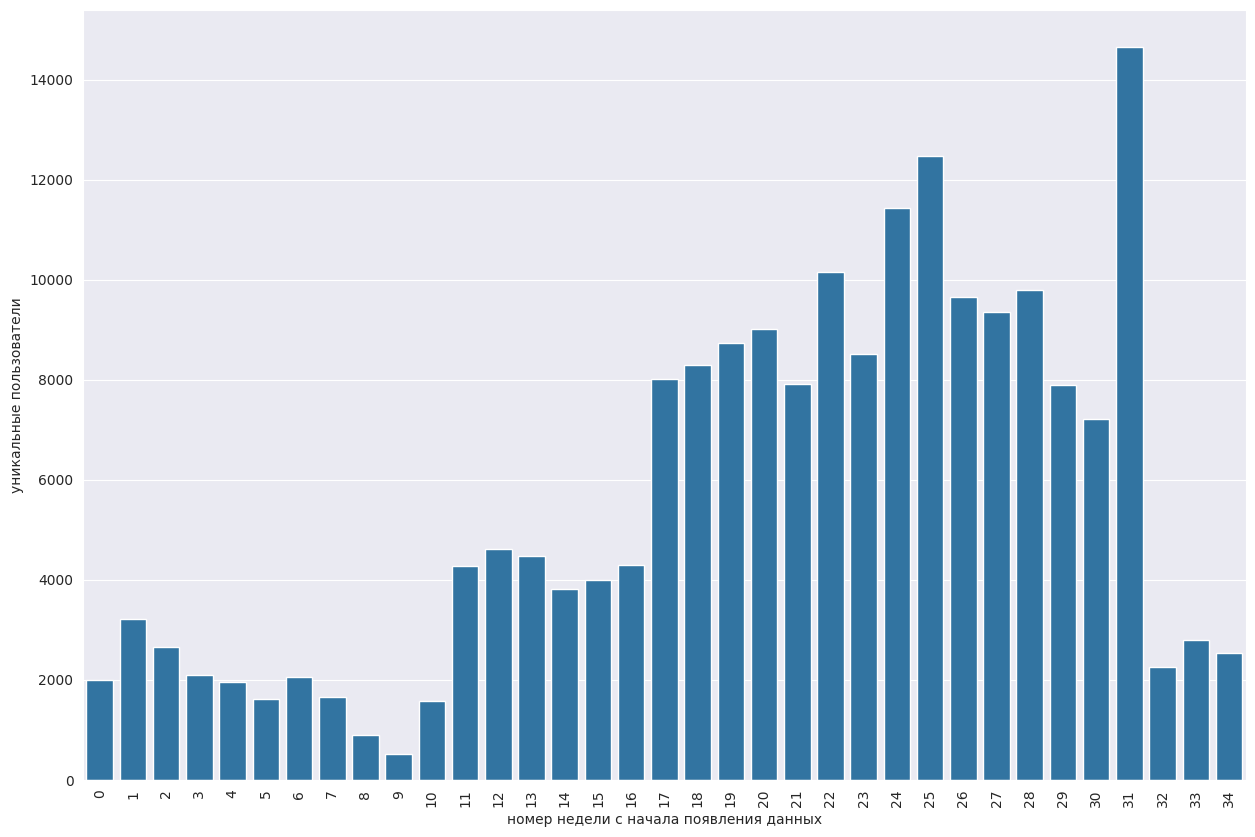

In [132]:
import seaborn as sns

plt.figure(figsize=(15, 10))

week_agg = df.groupby('week_number_from_start').agg(unique_users=('user_id', 'nunique'))

sns.set_style("darkgrid")

plot1 = sns.barplot(week_agg, x='week_number_from_start', y='unique_users')
plot1.set(xlabel='номер недели с начала появления данных', ylabel='уникальные пользователи')

plt.xticks(rotation=90)

plt.show()

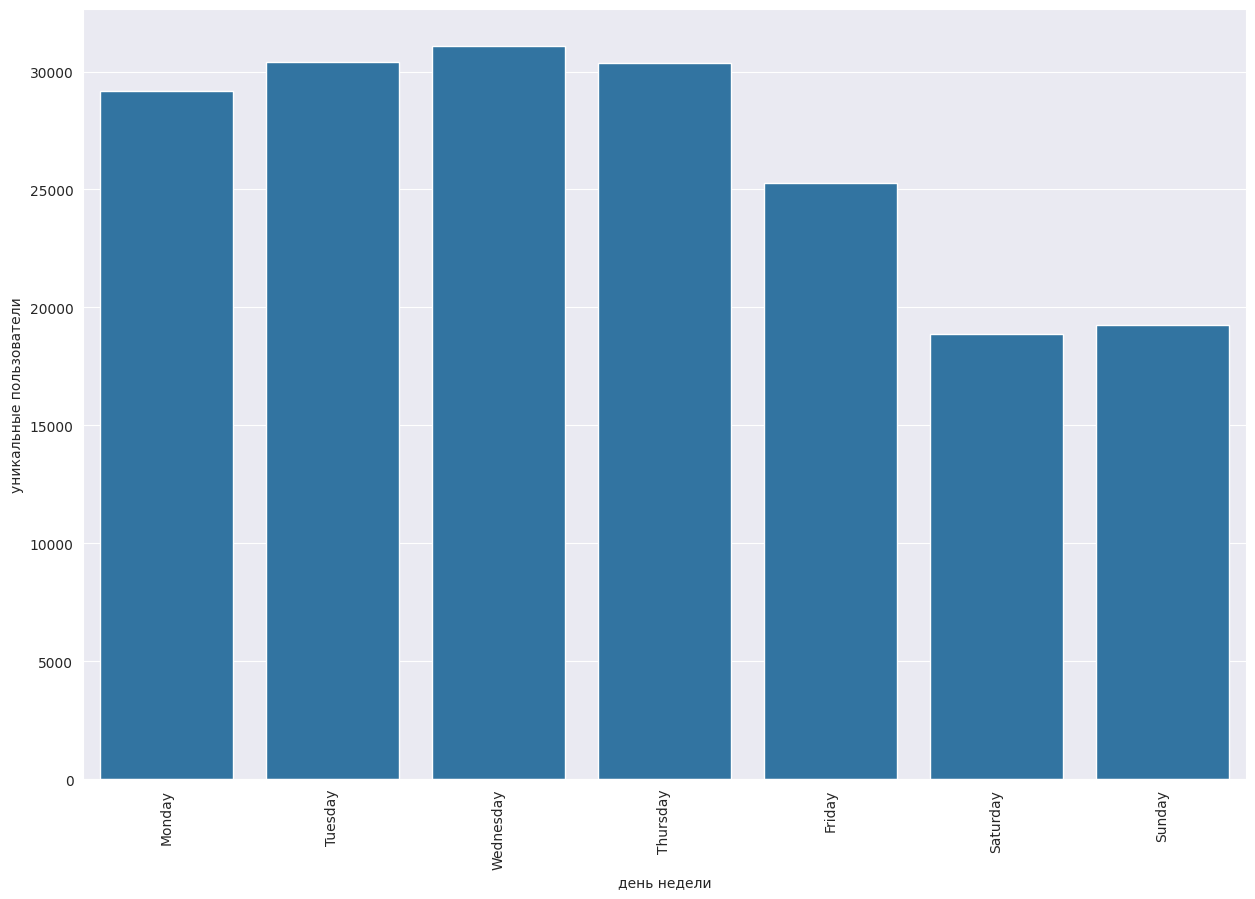

In [133]:
import seaborn as sns

plt.figure(figsize=(15, 10))

week_agg = df.groupby(['weekday', "week_name"]).agg(unique_users=('user_id', 'nunique'))

sns.set_style("darkgrid")

plot2 = sns.barplot(week_agg, x='week_name', y='unique_users')
plot2.set(xlabel='день недели', ylabel='уникальные пользователи')

plt.xticks(rotation=90)

plt.show()

### MAU

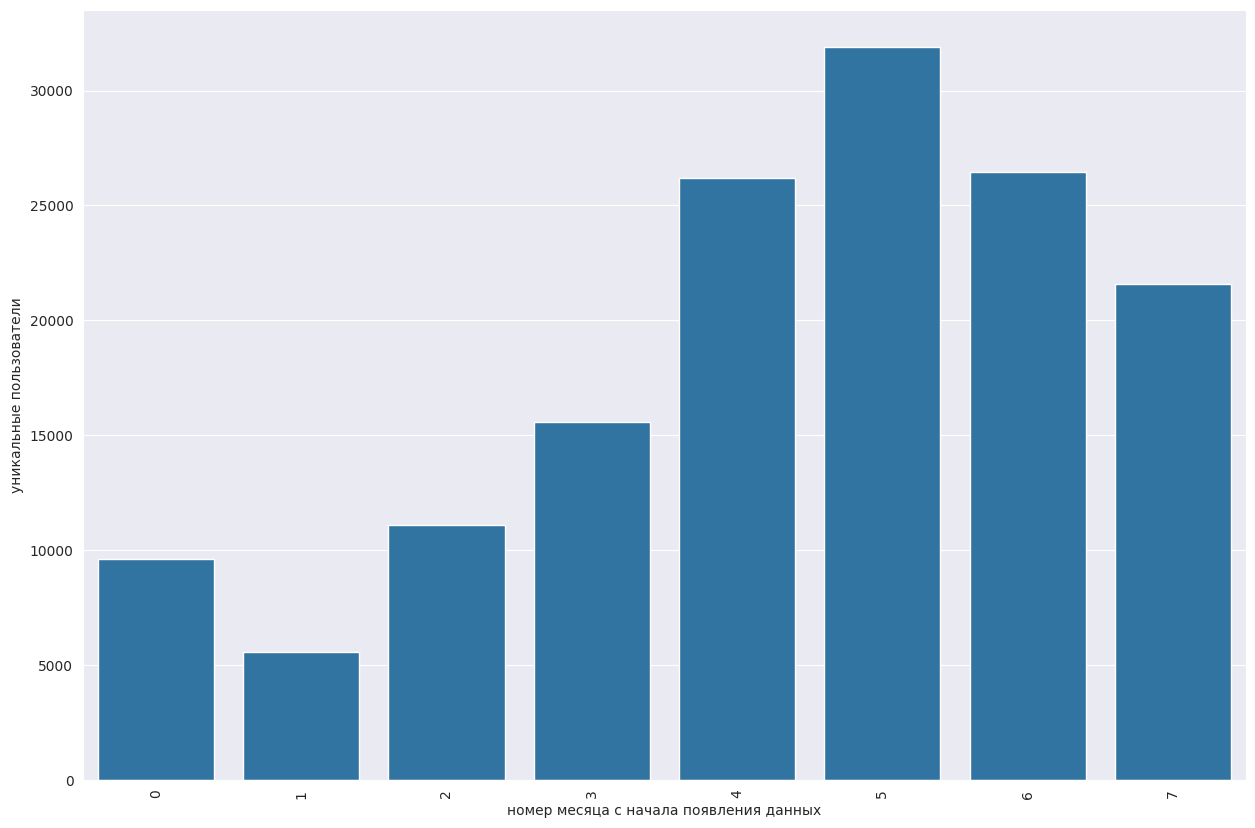

In [134]:
import seaborn as sns

plt.figure(figsize=(15, 10))

week_agg = df.groupby('month_number_from_start').agg(unique_users=('user_id', 'nunique'))

sns.set_style("darkgrid")
plot2 = sns.barplot(week_agg, x='month_number_from_start', y='unique_users')
plot2.set(xlabel='номер месяца с начала появления данных', ylabel='уникальные пользователи')


plt.xticks(rotation=90)

plt.show()

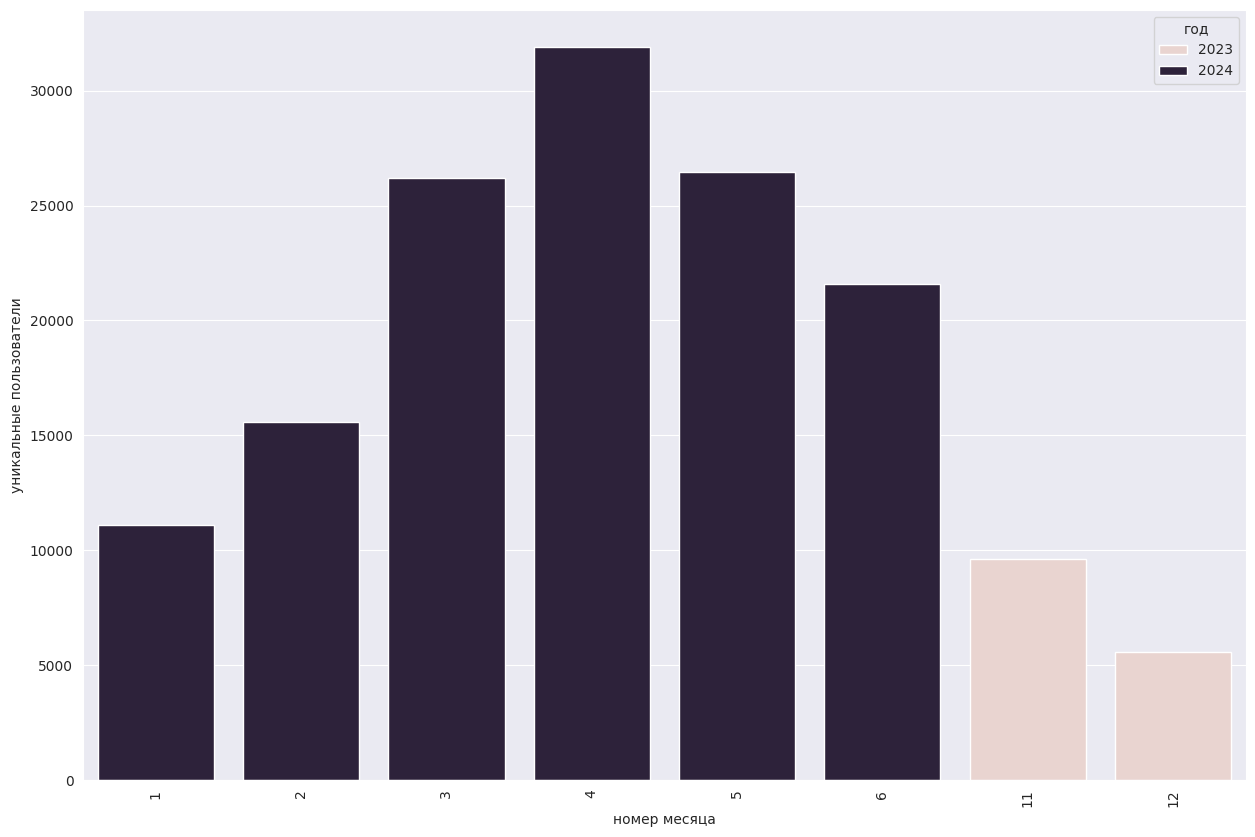

In [135]:
import seaborn as sns

plt.figure(figsize=(15, 10))

week_agg = df.groupby(['month_number', 'year_number']).agg(unique_users=('user_id', 'nunique'))

sns.set_style("darkgrid")
plot2 = sns.barplot(week_agg, x='month_number', y='unique_users', hue='year_number')
plot2.set(xlabel='номер месяца', ylabel='уникальные пользователи')
plot2.legend_.set_title('год')

plt.xticks(rotation=90)

plt.show()

### DAU

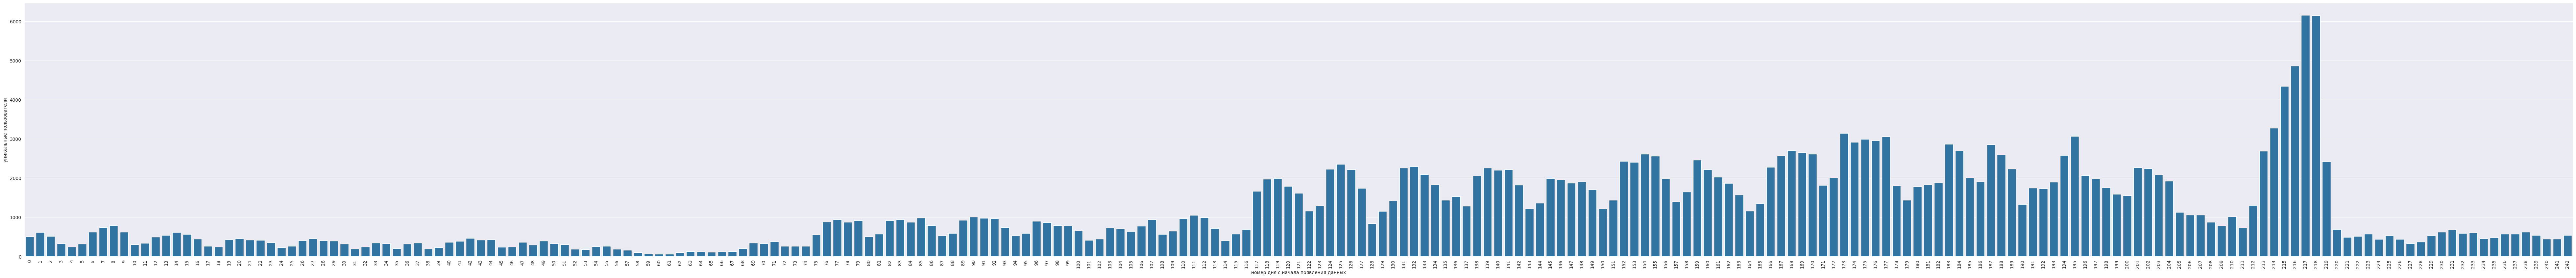

In [136]:
import seaborn as sns

plt.figure(figsize=(100, 10))

week_agg = df.groupby('day_number_from_start').agg(unique_users=('user_id', 'nunique'))

sns.set_style("darkgrid")
plot2 = sns.barplot(week_agg, x='day_number_from_start', y='unique_users')
plot2.set(xlabel='номер дня с начала появления данных', ylabel='уникальные пользователи')


plt.xticks(rotation=90)

plt.show()

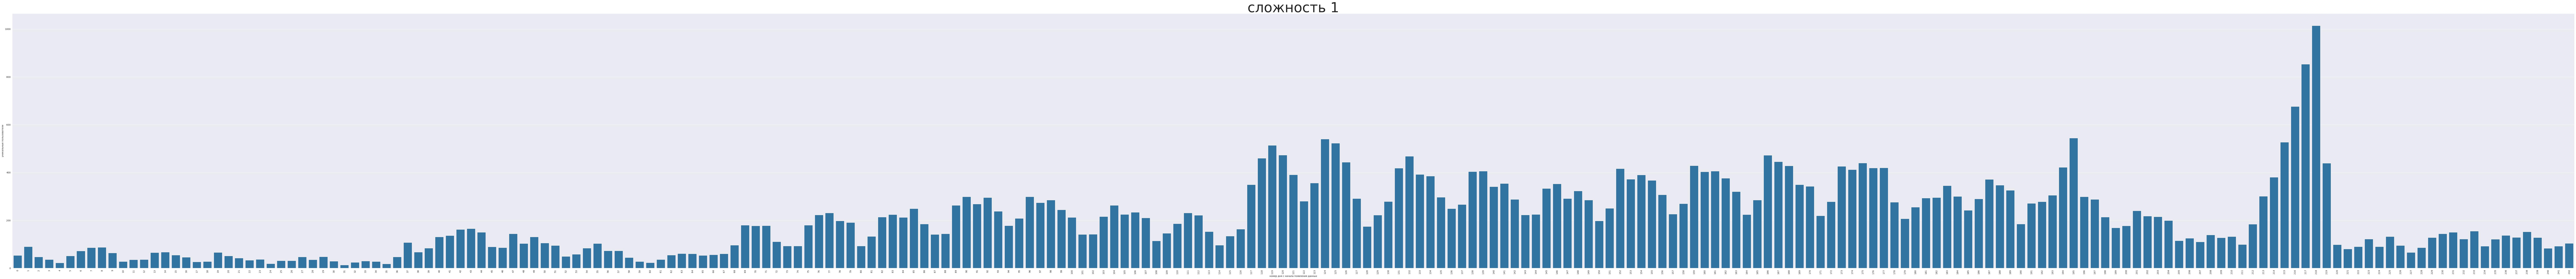

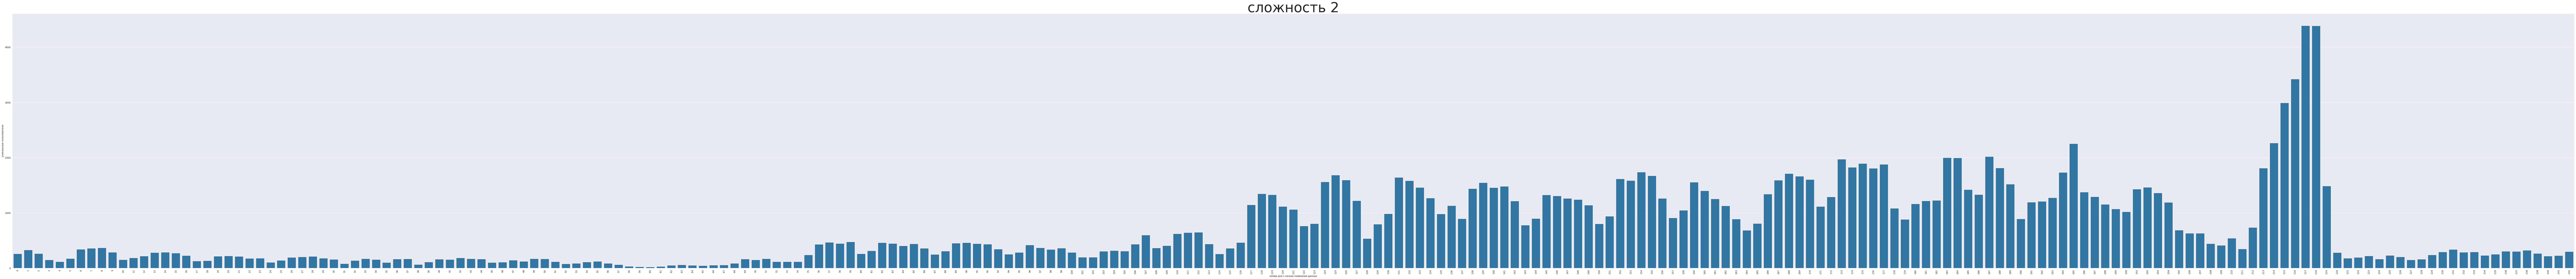

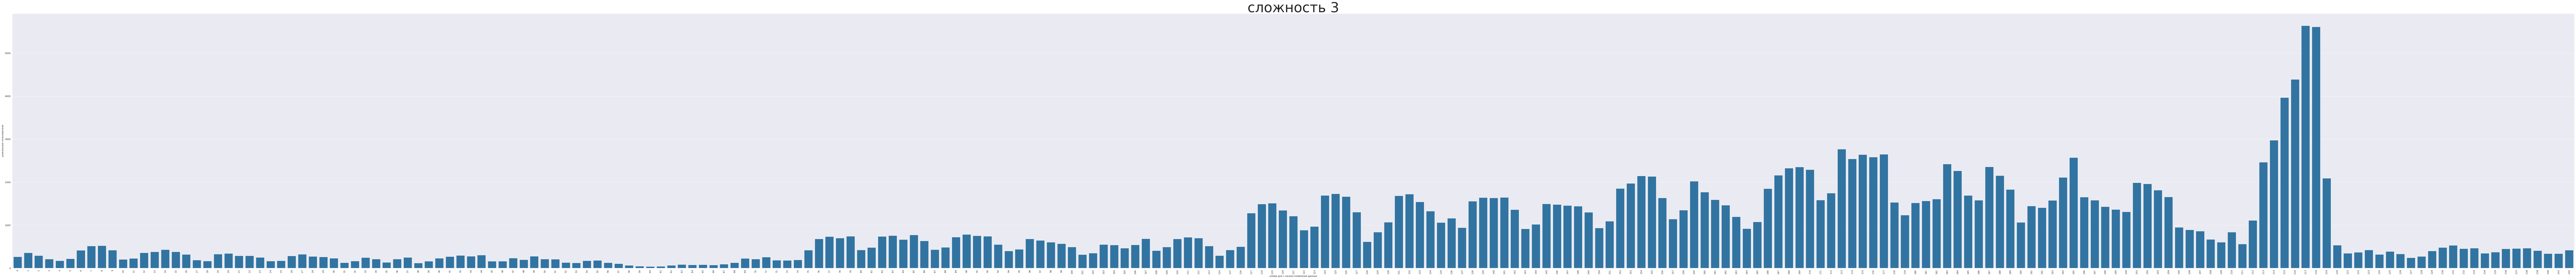

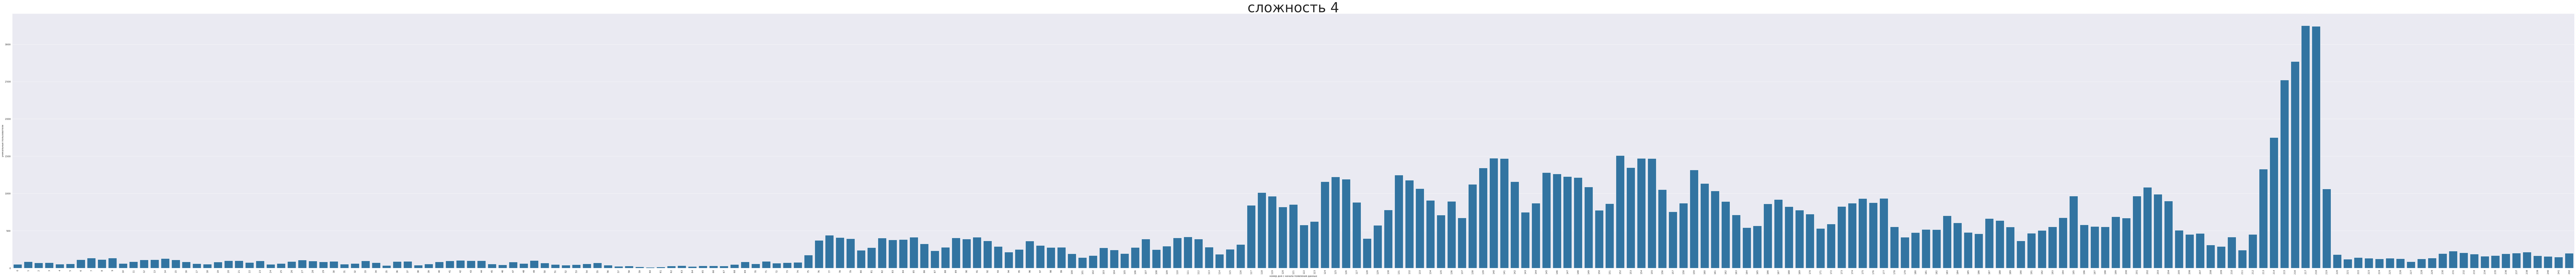

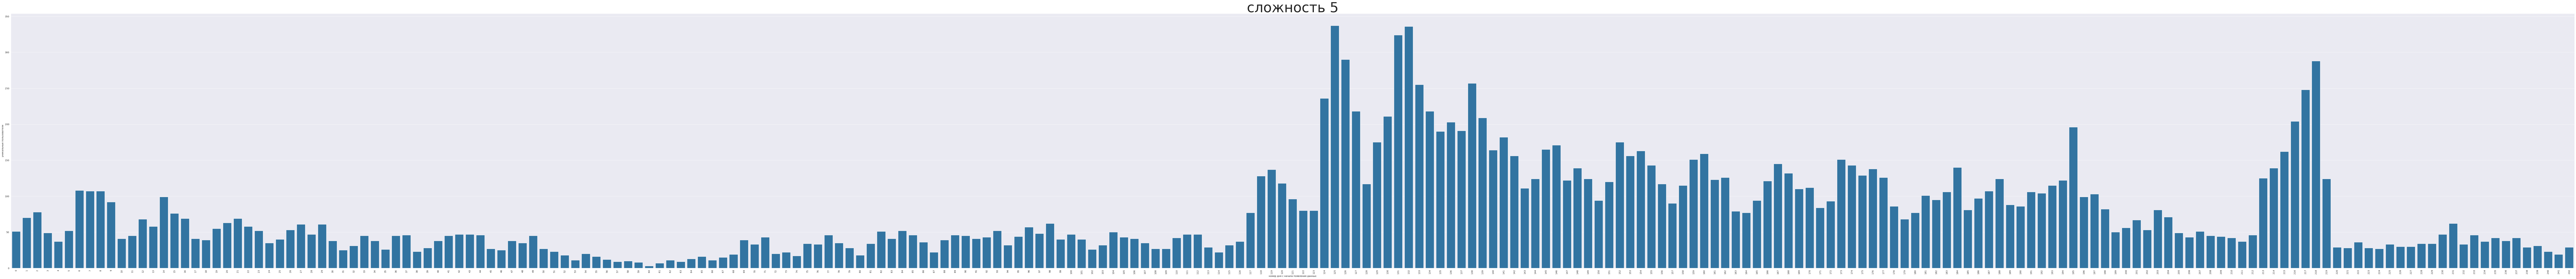

In [161]:
import seaborn as sns

for i in range(1, 6):
    plt.figure(figsize=(200, 20))
    week_agg = df[df['difficulty'] == i].groupby('day_number_from_start').agg(unique_users=('user_id', 'nunique'))

    sns.set_style("darkgrid")
    plot2 = sns.barplot(week_agg, x='day_number_from_start', y='unique_users')
    plot2.set(xlabel='номер дня с начала появления данных', ylabel='уникальные пользователи')
    plot2.set_title(f'сложность {i}', fontsize=60)


    plt.xticks(rotation=90)

    plt.show()

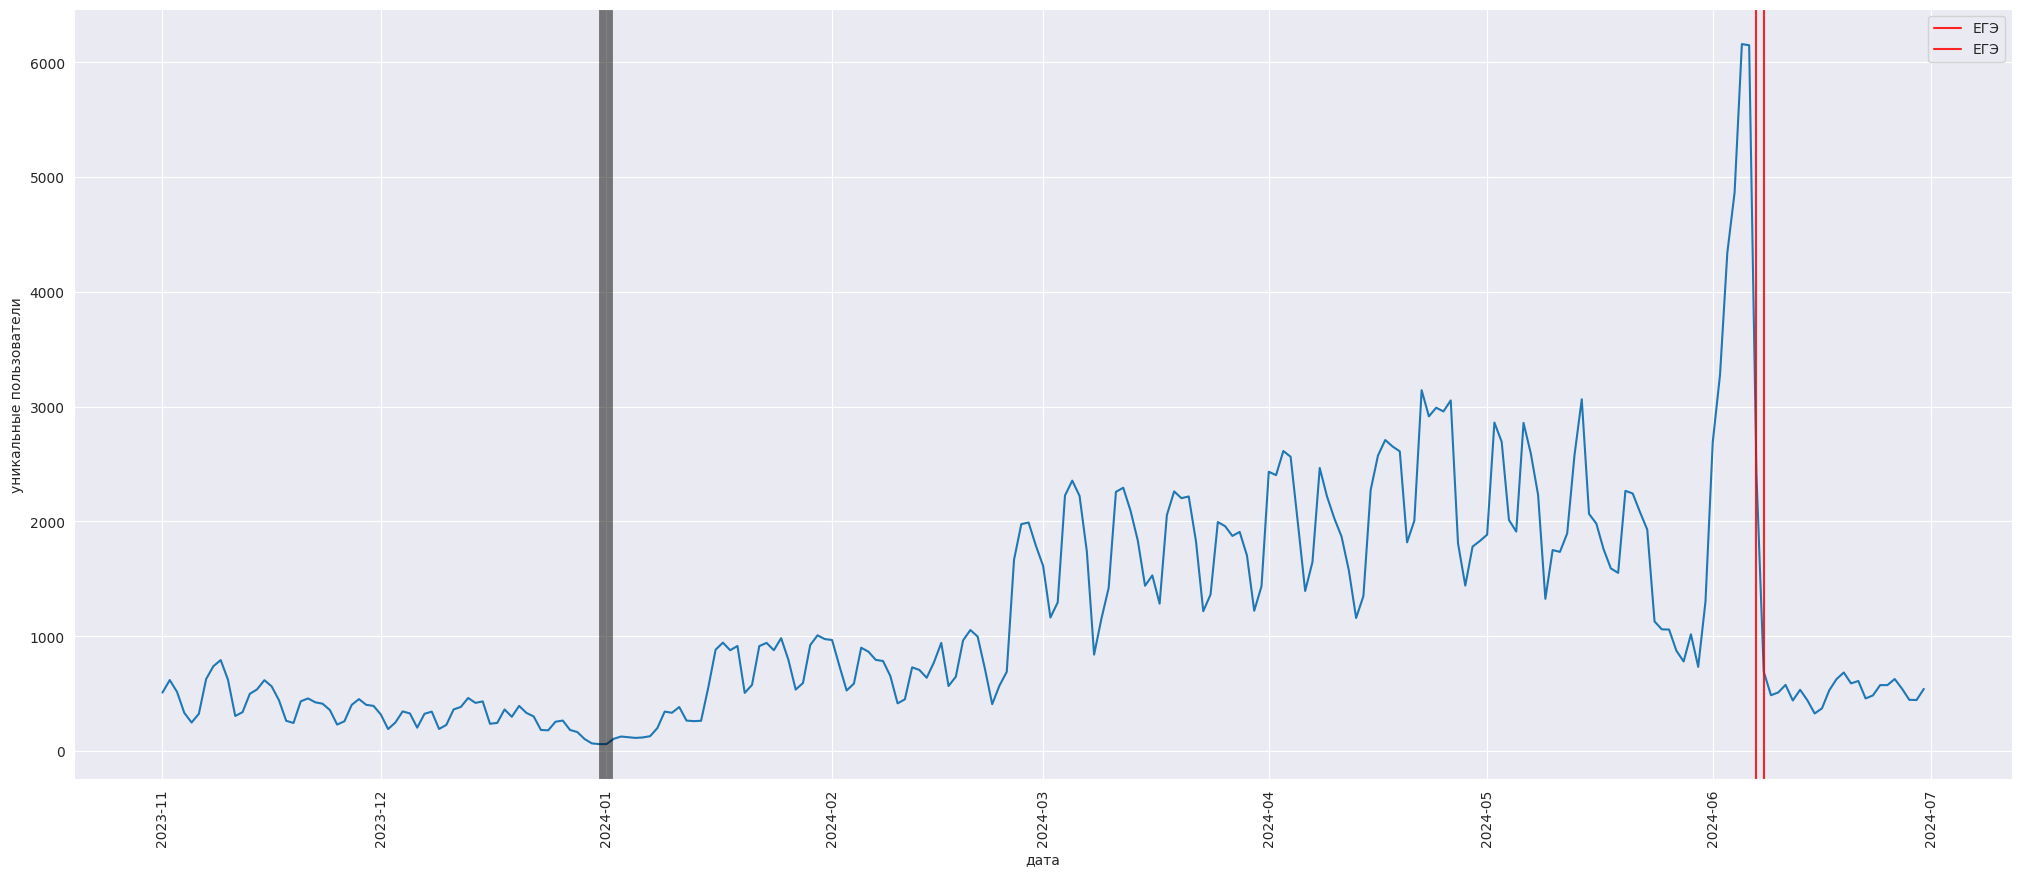

In [154]:
import seaborn as sns

plt.figure(figsize=(25, 10))

week_agg = df.groupby(['day_number_from_start', 'date']).agg(unique_users=('user_id', 'nunique'))

sns.set_style("darkgrid")

new_year=pd.to_datetime('2024-1-1')
ege_dates= {
    # география, литература, химия
    # pd.to_datetime('2024-05-23'),
    
    # русский язык
    # pd.to_datetime('2024-5-28'),
    
    # русский язык
    # pd.to_datetime('2024-5-29'),
    
    # математика базового уровня, математика профильного уровня
    # pd.to_datetime('2024-5-31'),
    
    # математика базового уровня, математика профильного уровня
    # pd.to_datetime('2024-6-1'),
    
    # обществознание, физика
    # pd.to_datetime('2024-6-4'),
    
    # иностранные языки (английский, испанский, китайский, немецкий, французский) (устная часть), информатика
    pd.to_datetime('2024-6-7'),
    
    # иностранные языки (английский, испанский, китайский, немецкий, французский) (устная часть), информатика
    pd.to_datetime('2024-6-8'),
    
    # биология, иностранные языки (английский, испанский, китайский, немецкий, французский) (письменная часть), история
    # pd.to_datetime('2024-6-11')
}
plot = sns.lineplot(
        week_agg, 
        x='date', 
        y='unique_users'
    )
plot.axvline(x=new_year, color='black', linewidth = 10, alpha=0.5)
for i in ege_dates:
    plot.axvline(x=i, color='red', linewidth = 1.5, alpha=0.85, label='ЕГЭ')
plot.set(xlabel='дата', ylabel='уникальные пользователи')
plot.legend()

plt.xticks(rotation=90)

plt.show()

### Export

In [138]:
df.to_csv('processed_inf_ege_data.csv')